[1] Datenbank, [2] lz77 testen 1
In welcher Reichweite sollen die Wiederholungen der Preview_Window_Size sich bewegen?  100
In welcher Reichweite sollen die Wiederholungen der Search_Window size sich bewegen?  100


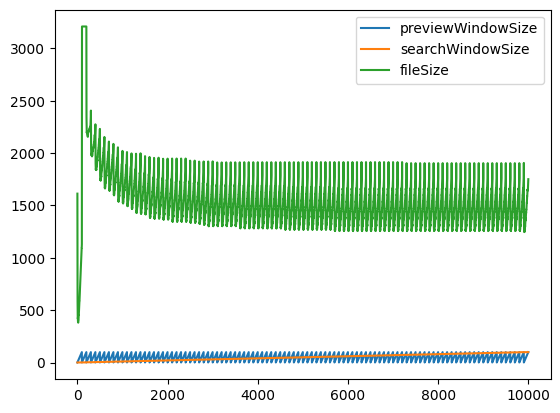

In [21]:
Input = int(input("[1] Datenbank, [2] lz77 testen"))
if Input == 1:
    create_db()
elif Input == 2:
    lz77(1, 1, "None", False)

In [19]:
import csv
import os.path
import pandas as pd

def create_db():
    
    f = open('database_size.csv', 'w')
    writer = csv.writer(f)
    
    #mainloop
    range_preview = int(input("In welcher Reichweite sollen die Wiederholungen der Preview_Window_Size sich bewegen? "))
    range_search = int(input("In welcher Reichweite sollen die Wiederholungen der Search_Window size sich bewegen? "))
    
    writer.writerow(['previewWindowSize']+['searchWindowSize']+['fileSize'])

    searchWindowSize = 1
    previewWindowSize = 1

    s = 1
    p = 1
    while s <= range_search:
        while p <= range_preview:
            lz77(s, p, "sampleFile.txt", True)
            filePath = r'compressed.txt'
            sampleFilePath = r'sampleFile.txt'
            fileSize = os.path.getsize(filePath)
            writer.writerow([p]+[s]+[fileSize])
                
            p += 1
            
        p = 1
        s += 1
        
    f.close()
    
    df = pd.read_csv("database_size.csv")
    df.plot()


In [1]:
def lz77(searchWindowSize, previewWindowSize, filename, isAutomatic):
    
    # s1 == Inhalt beide Fenster, s2 == Inhalt Lookahead
    def longest_common_substring(s1, s2):
      maxLongest = 0
      offset = 0
      # len(s1) == Endposition der Fenster; i == Position => range = gesamte Länge => für jede Ziffer in Länge beider Fenster
      for i in range(0, len(s1)):
        longest = 0  # Variablen werden zurückgesetzt
        if i == len(s1) - len(s2) - 2:  # Fehler
          break
        for j in range(0,
                       len(s2)):  # für jede Zahl in der Länge des Preview Windows
          if (
              i + j < len(s1)
          ):  # wenn position gesamt + position preview kleinber als die Gesamtlänge => solange man sich innerhalb des bekannten Bereichs befindet
            if s1[i + j] == s2[j]:  # wenn  beide Positionen übereinstimmen
              longest = longest + 1  # variablen festlegen
              if (maxLongest <
                  longest):  # wenbn kein längerer String gefunden wurde
                maxLongest = longest
                offset = i  # offset entspricht der Position im gesamten String
            else:  # Fehler
              break
          else:  # Fehler
            break
      return maxLongest, offset  # return == Rückgabewerte der Funktion


    def encode_lz77(text, searchWindowSize, previewWindowSize):
      encodedNumbers = []  #{
      encodedSizes = []  #  Variablen zurücksetzten//definieren
      encodedLetters = []  #}
      i = 0  # i = Position im Text i == 0, weil 0 Position 1 ist
      while i < len(text):  # solange man sich im bekannten Bereich befinfet
        if i < previewWindowSize:  # solange es wegen der Position der Fenster noch keine Übereinstimmungen gibt
          encodedNumbers.append(0)  #{
          encodedSizes.append(
            0)  #  append = zu Array hinzufügen, hier wird die "Tabelle" definiert
          encodedLetters.append(text[i])  #}
          i += 1  # Position wird "aktualisiert"
        else:
          previewString = text[
            i:i + previewWindowSize]  # dem Preview Window Inhalt zuweisen
          searchWindowOffset = 0  # Position des searchWindow wird zu Null gesetzt
          if (i < searchWindowSize):
            searchWindowOffset = i
          else:
            searchWindowOffset = searchWindowSize
          searchString = text[i - searchWindowOffset:i]
          result = longest_common_substring(
            searchString + previewString, previewString
          )  # Funktion aufrufen, result = Rückgabewert longest_common_substring. longest_common_substring gibt den längsten übereinstimmenden Text zurück
          nextLetter = ''  # Variable "leeren"/"zurücksetzen"
          if (result[0] == len(previewString)):  # {
            if (i + result[0] == len(text)):
              nextLetter = ''
            else:
              nextLetter = text[i + previewWindowSize]
          else:
            nextLetter = previewString[result[0]]
          if (result[0] == 0):
            encodedNumbers.append(0)
            encodedSizes.append(0)
            encodedLetters.append(nextLetter)
          else:
            encodedNumbers.append(searchWindowOffset - result[1])
            encodedSizes.append(result[0])
            encodedLetters.append(nextLetter)
          i = i + result[0] + 1  # } Formattierung
      return encodedNumbers, encodedSizes, encodedLetters


    def decode_lz77(encodedNumbers, encodedSizes, encodedLetters):
      i = 0  # i entspricht Position im encodeten String
      decodedString = []  # "Ergebnis", encodeter Text
      while i < len(encodedNumbers):  # solange man sich im Code befindet
        if (encodedNumbers[i] == 0):
          decodedString.append(encodedLetters[i])
        else:
          currentSize = len(decodedString)
          for j in range(0, encodedSizes[i]):
            decodedString.append(decodedString[currentSize - encodedNumbers[i] +
                                               j])
          decodedString.append(encodedLetters[i])
        i += 1
      return decodedString  # Ergebnis

    
    #========================================================================================================
    #Start "Main-Loop"
    if isAutomatic == False:
        print("LZ77 Compression Algorithm")
        print("=================================================================")
        h = int(
          input(
            "Enter 1 if you want to enter input in command window, 2 if you are using some file:"
          ))
        if h == 1:
          stringToEncode = input("Enter the string you want to compress:")
        elif h == 2:
          file = input("Enter the filename:")
          with open(file, 'r') as f:
            stringToEncode = f.read()
        else:
          print("You entered invalid input")
        print("Enetered string is:", stringToEncode)
        searchWindowSize = int(input("Enter the Search Window Size:"))
        previewWindowSize = int(input("Enter the Preview Window Size:"))
    else:
        file = filename
        with open(file, 'r') as f:
            stringToEncode = f.read()
    
    
    [encodedNumbers, encodedSizes, encodedLetters] = encode_lz77(stringToEncode, searchWindowSize,previewWindowSize)
    a = [encodedNumbers, encodedSizes, encodedLetters]
    #print("Compressed file generated as compressed.txt")
    output = open("compressed.txt", "w+")
    output.write(str(a))
    #print("Encoded string: ", end="")
    i = 0
    while i < len(encodedNumbers) and isAutomatic == False:  # Ausgabe der "Tabelle"
      print("{",
            encodedNumbers[i],
            ":",
            encodedSizes[i],
            ":",
            encodedLetters[i],
            "}",
            end=" ")
      i += 1
    if isAutomatic == False: print("\n")
    decodedString = decode_lz77(encodedNumbers, encodedSizes, encodedLetters)
    if isAutomatic == False: print("Decoded string:", "".join(decodedString))

FileNotFoundError: [Errno 2] No such file or directory: 'database_size.csv'